# Application of CNN Model to Recognize Handwritten Bangla Characters

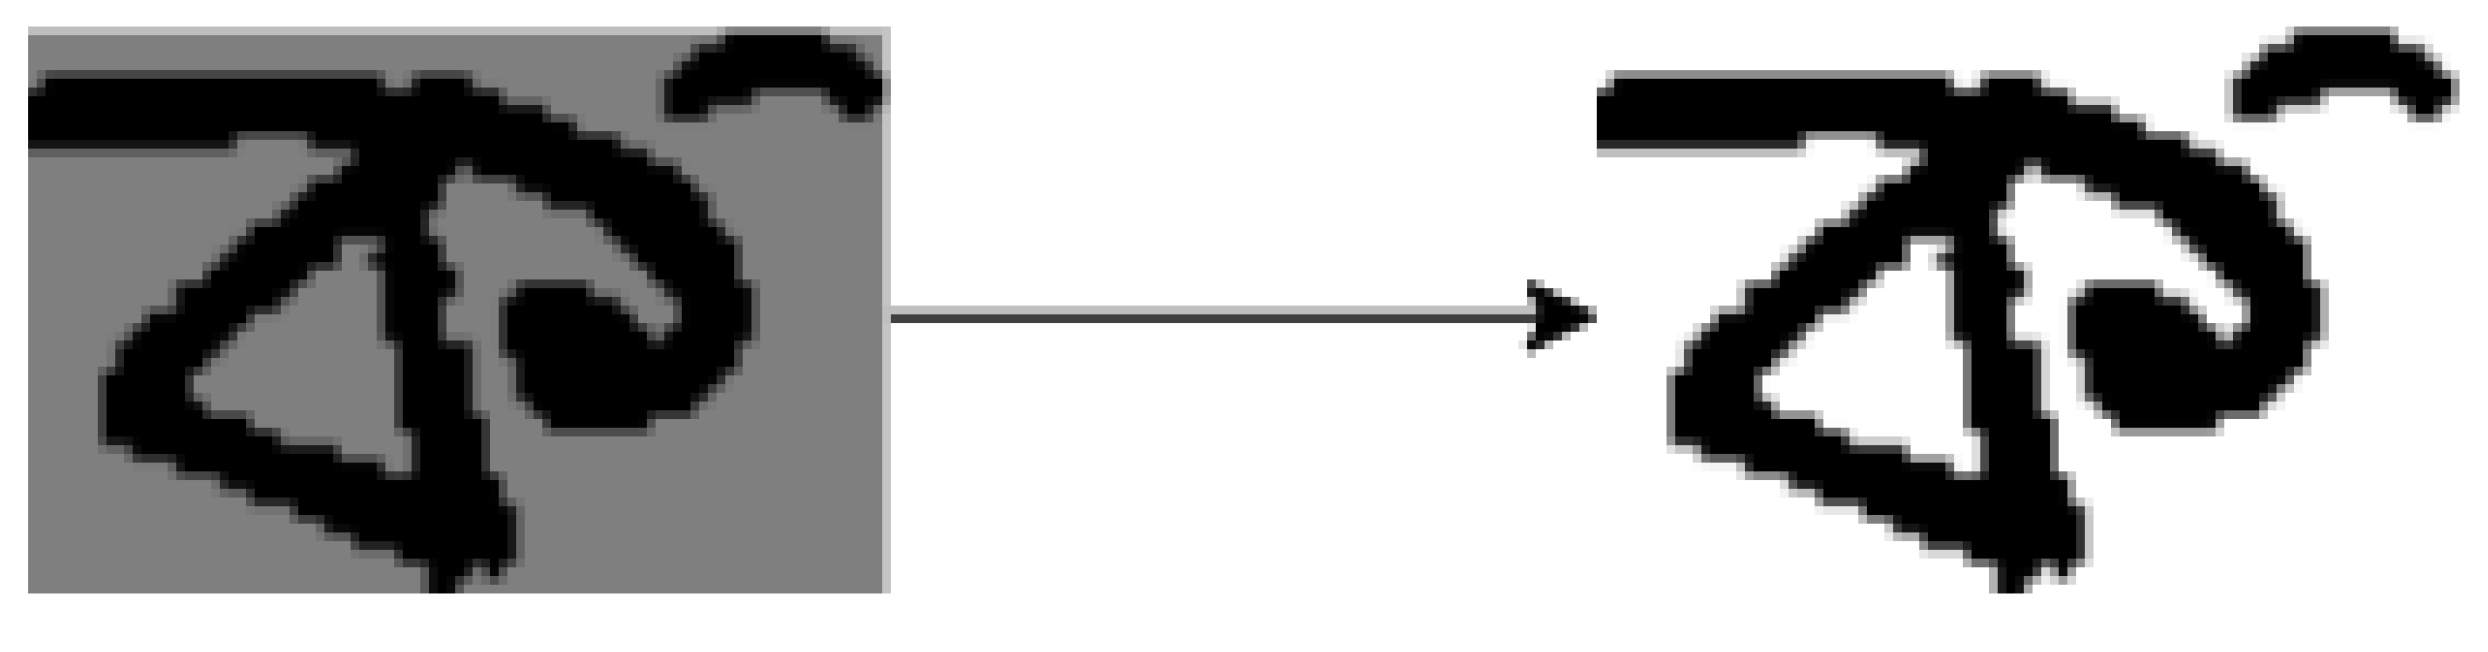
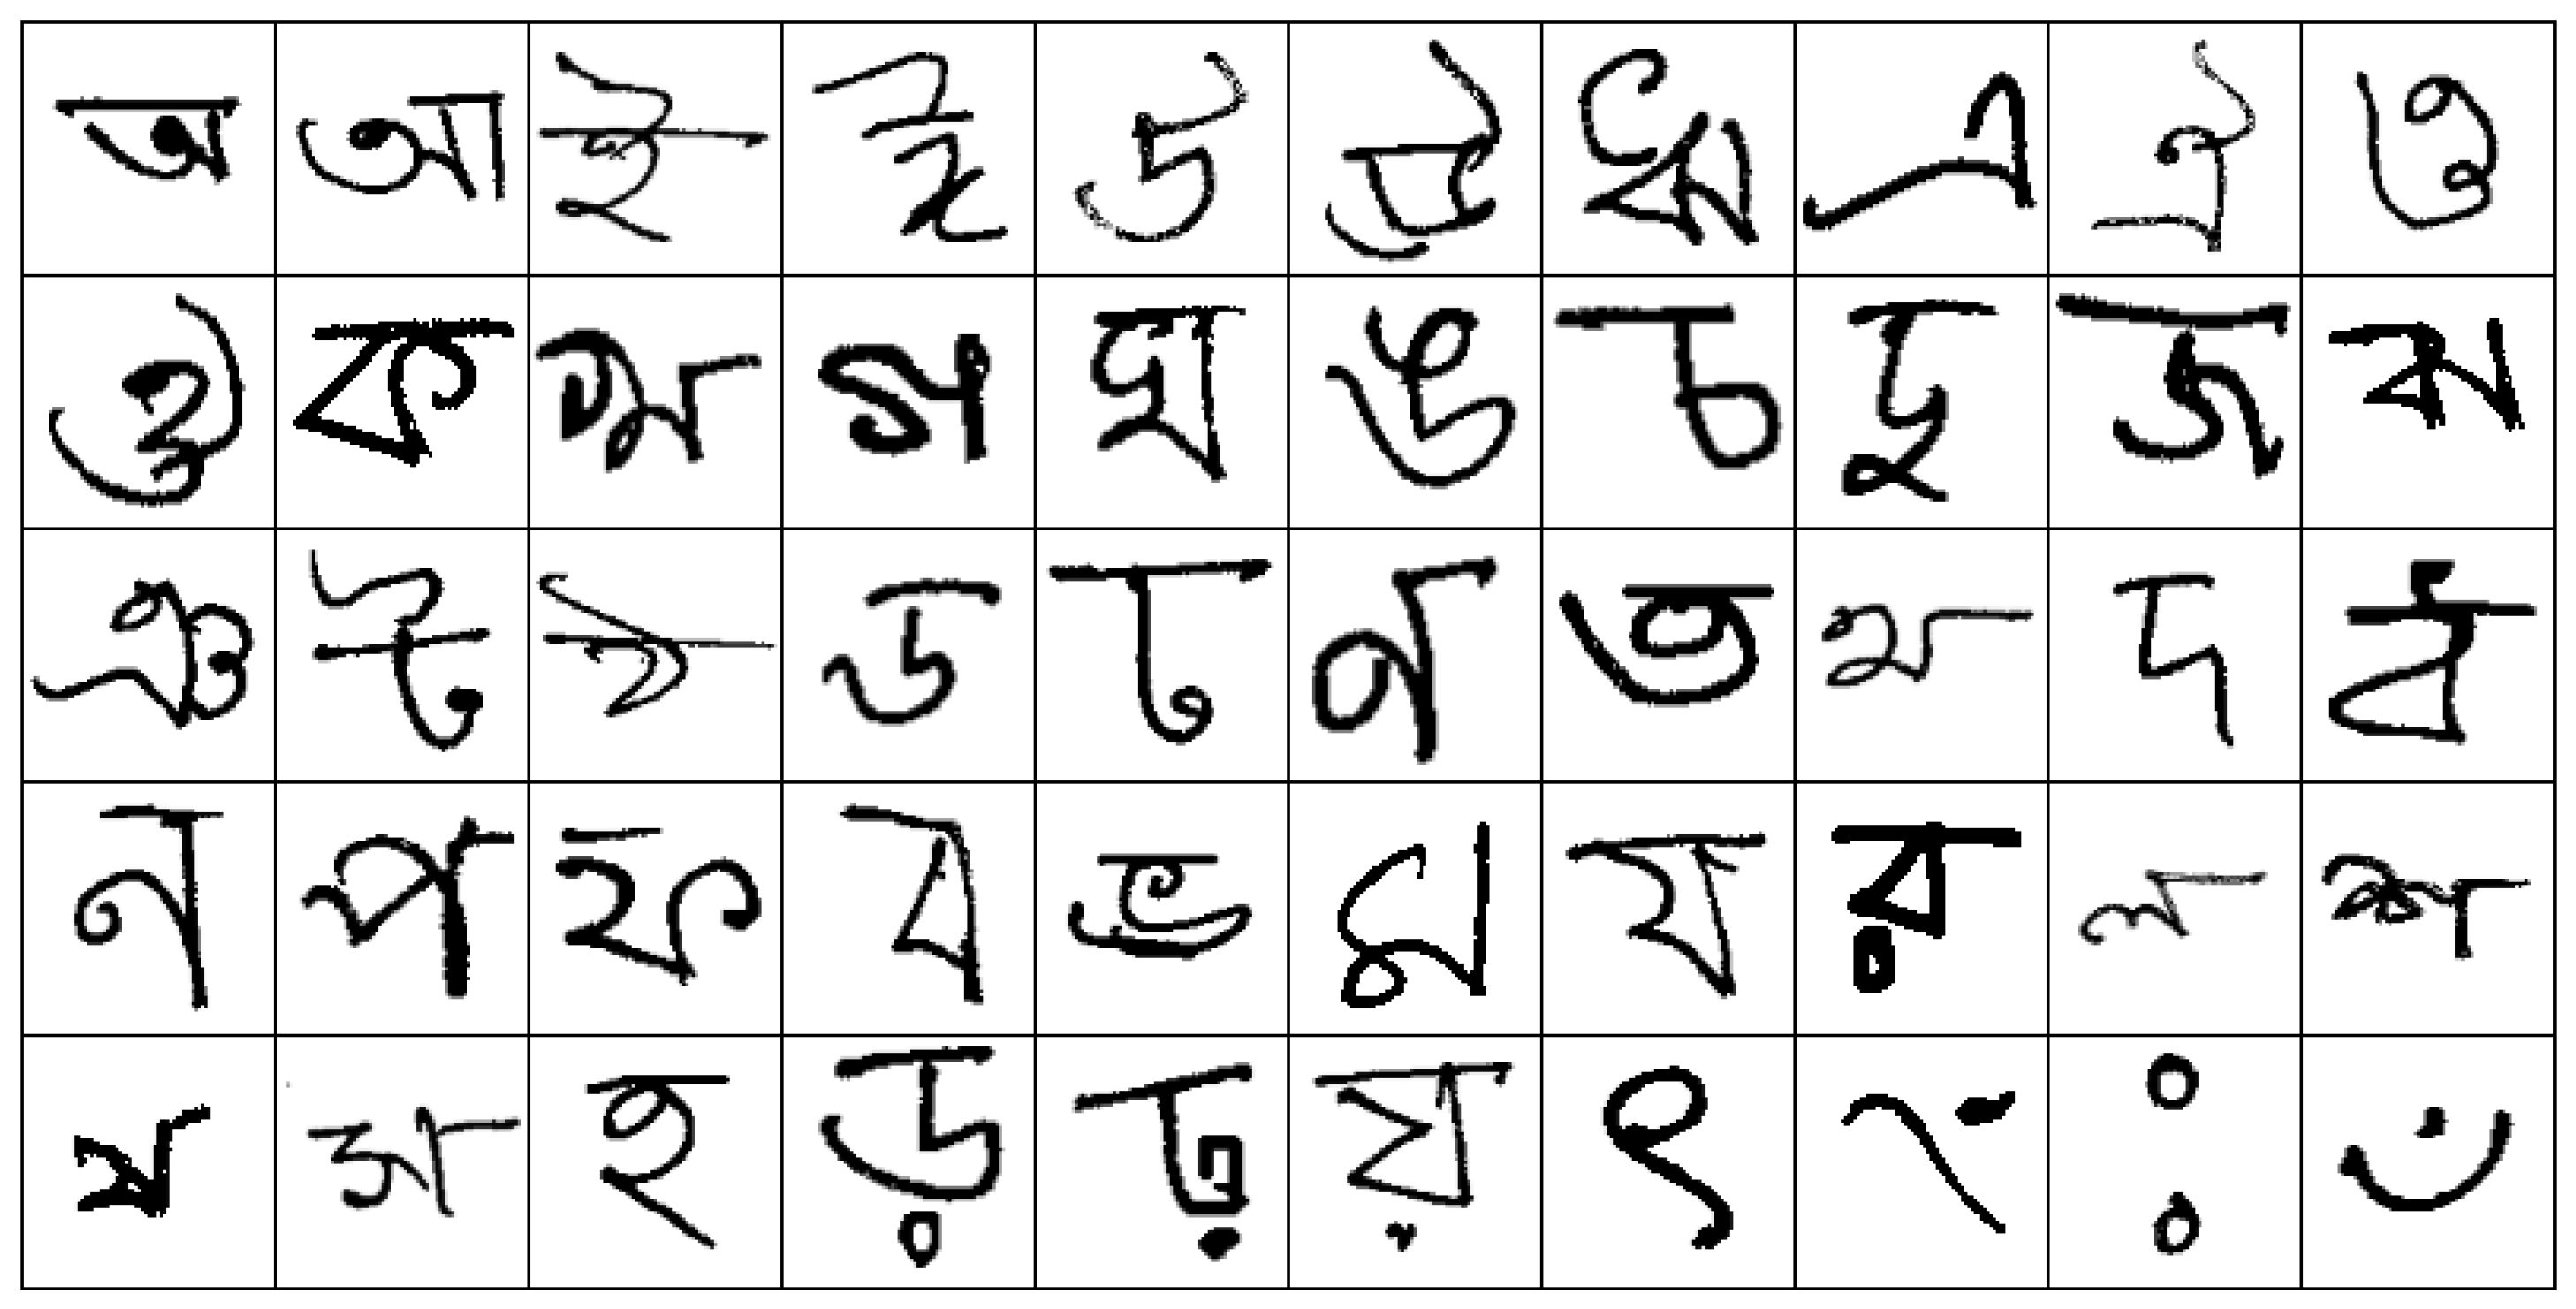

# Introduction

Handwritten character recognition plays a vital role in Optical Character Recognition (OCR) systems, enabling the conversion of handwritten documents into machine-readable text. While significant progress has been made in recognizing Latin characters, Bangla—one of the most widely spoken languages in the world—has received comparatively less attention in this domain due to its complex script and large set of characters. Recognizing Bangla characters accurately is essential for applications such as automated form processing, educational tools, and digital archiving. With the rapid advancement of deep learning techniques, especially Convolutional Neural Networks (CNNs), it has become possible to achieve high accuracy in image-based classification tasks. In this project, we explore the application of CNN models to recognize isolated handwritten Bangla characters using a curated dataset. The aim is to develop a robust and scalable recognition system that can contribute to Bangla OCR research and real-world automation.

**Import nessessary Libries**

This code imports essential libraries for building, training, and evaluating a Convolutional Neural Network (CNN) for image classification using TensorFlow and Keras. ImageDataGenerator is used to load and preprocess image data with real-time data augmentation. Core libraries like NumPy and Matplotlib support numerical operations and visualization. TensorFlow’s layers and models help define neural network structures such as convolutional layers (Conv2D), pooling layers (AveragePooling2D), dropout for regularization, and dense layers for classification. Sequential is used to build the model layer-by-layer. EarlyStopping monitors validation performance and stops training early to prevent overfitting. For evaluation, classification_report, confusion_matrix, and roc_curve from scikit-learn assess model accuracy and performance across classes. Seaborn is used for visually enhanced plotting (e.g., heatmaps). Lastly, warnings are suppressed using Python’s warnings module to keep the notebook output clean and readable. This setup forms the foundation for training and evaluating an image classification model.



In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

2025-05-05 01:33:23.684261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746408803.878381      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746408803.934290      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# import Datasets

This datasets collect from https://drive.google.com/drive/folders/1QRCpFwX4mc2EPlKUD-3MHwNSJYqQh_1J?usp=sharinggit (Ekush: Bangla Handwritten Characters Dataset
)

In [2]:
train_folder = '/kaggle/input/dataset1/basicfinal/basicfinal/Train'
test_folder = '/kaggle/input/dataset1/basicfinal/basicfinal/Test'
val_folder = '/kaggle/input/dataset1/basicfinal/basicfinal/Val'

### Image Data Augmentation and Preprocessing

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

### Loading Data from Directories & Using Adam Optimizer

In [4]:
batch_size = 64
image_size = (28,28)

train_generator = train_datagen.flow_from_directory(train_folder, target_size=image_size, batch_size=batch_size, class_mode='categorical', color_mode='grayscale')
test_generator = test_datagen.flow_from_directory(test_folder, target_size=image_size, batch_size=batch_size, class_mode='categorical', color_mode='grayscale', shuffle=False)
val_generator = val_datagen.flow_from_directory(val_folder, target_size=image_size, batch_size=batch_size, class_mode='categorical', color_mode='grayscale')


input_shape = (image_size[0], image_size[1], 1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.AveragePooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    Dense(50, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=100, validation_data=val_generator, callbacks=[early_stop])

Found 8400 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.
Found 3600 images belonging to 50 classes.


I0000 00:00:1746408832.096048      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746408832.097048      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/100


I0000 00:00:1746408840.039050      82 service.cc:148] XLA service 0x7fe82c006300 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746408840.039881      82 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746408840.039907      82 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746408840.465583      82 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/131 ━━━━━━━━━━━━━━━━━━━━ 22:12 10s/step - accuracy: 0.0000e+00 - loss: 3.9224

I0000 00:00:1746408844.608217      82 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


131/131 ━━━━━━━━━━━━━━━━━━━━ 77s 516ms/step - accuracy: 0.0285 - loss: 3.8995 - val_accuracy: 0.1017 - val_loss: 3.5073
Epoch 2/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.0625 - loss: 3.7488 - val_accuracy: 0.1131 - val_loss: 3.4932
Epoch 3/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - accuracy: 0.1101 - loss: 3.4711 - val_accuracy: 0.2317 - val_loss: 2.9409
Epoch 4/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1875 - loss: 3.1462 - val_accuracy: 0.2367 - val_loss: 2.9338
Epoch 5/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 94ms/step - accuracy: 0.1745 - loss: 3.1057 - val_accuracy: 0.3147 - val_loss: 2.5580
Epoch 6/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3438 - loss: 2.5423 - val_accuracy: 0.3206 - val_loss: 2.5475
Epoch 7/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.2309 - loss: 2.7642 - val_accuracy: 0.3894 - val_loss: 2.2248
Epoch 8/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4062 - loss: 2.1805 - val_acc

### Save model architecture plot

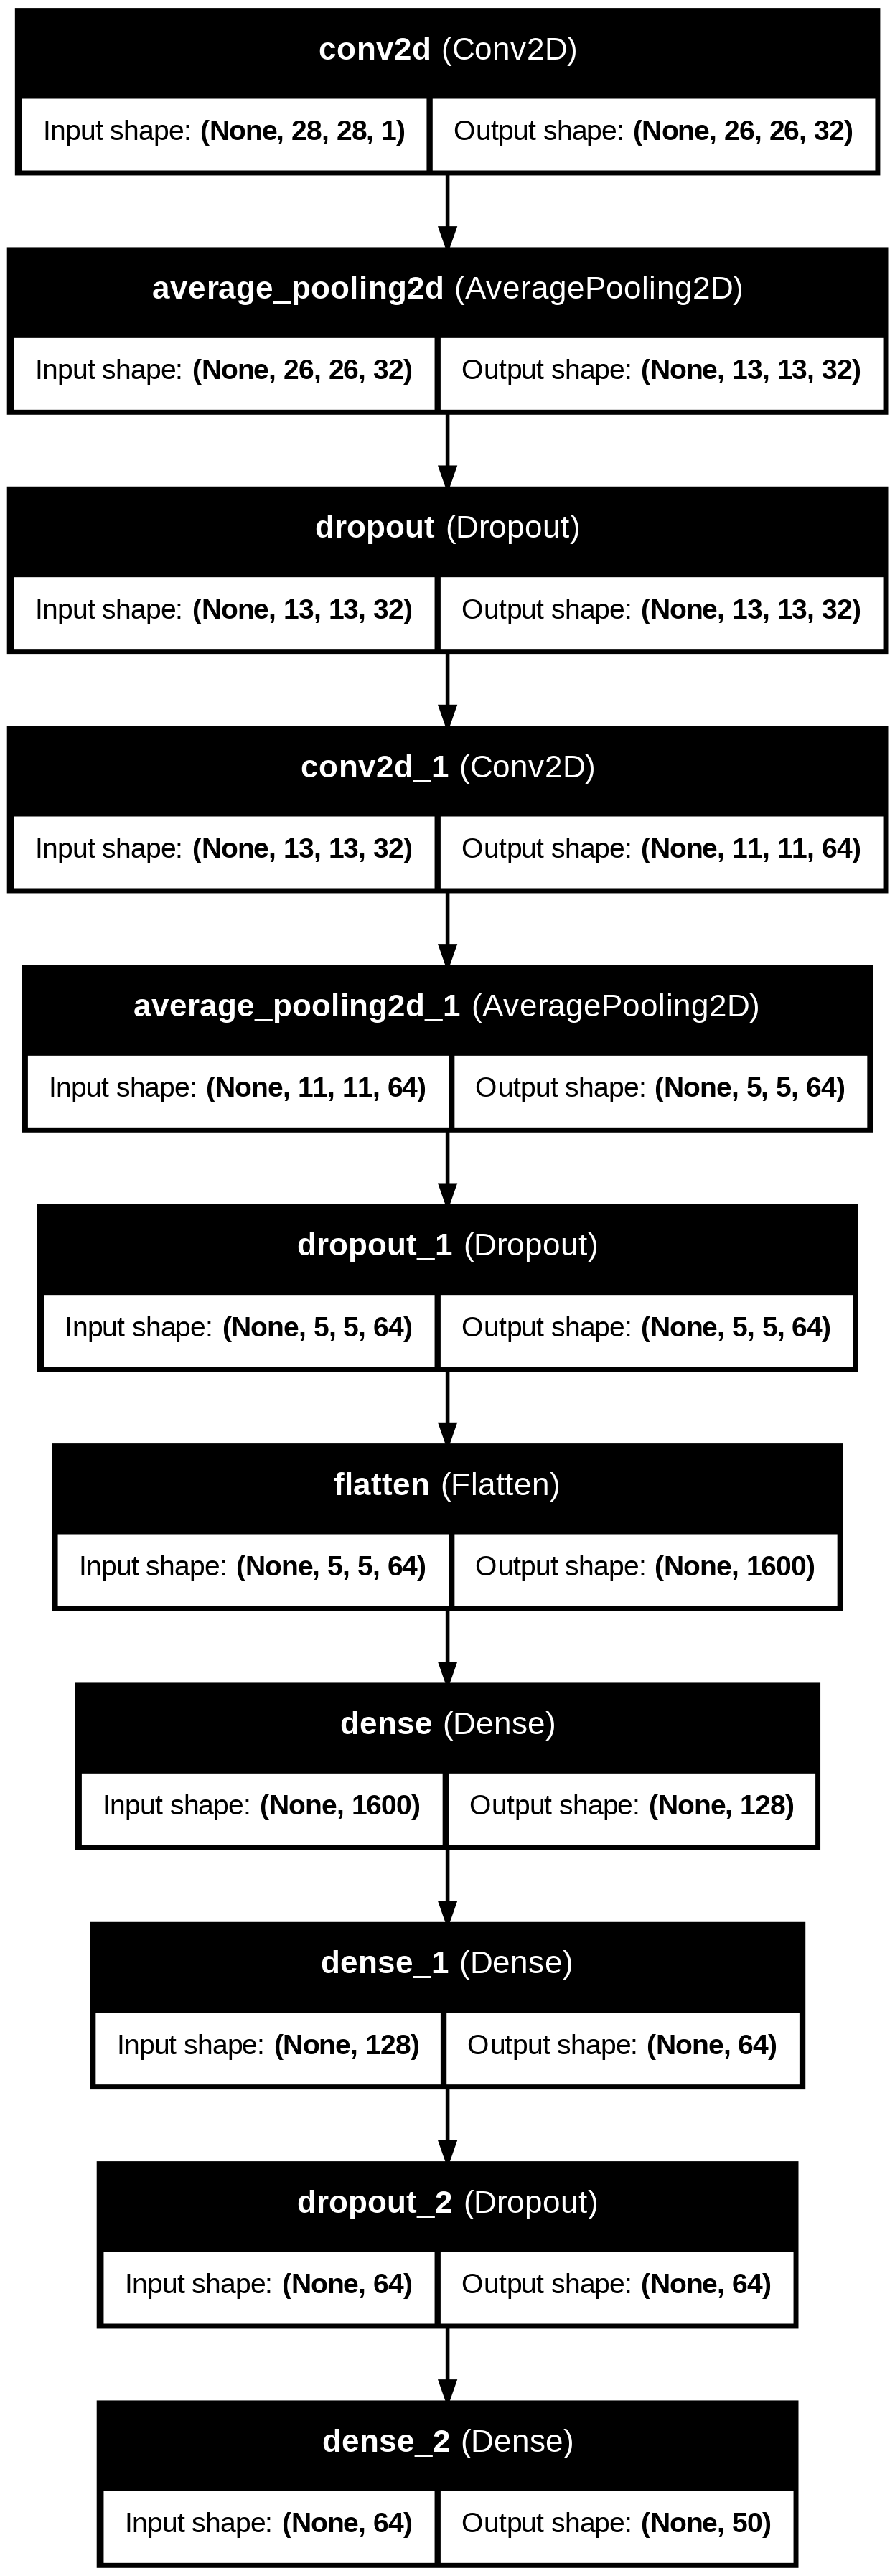

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# from tensorflow.keras.models import Sequential
# from tensorflow.keras import layers
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.utils import plot_model

# # Define the input shape
# image_size = (28, 28)  # Example input image size (you can modify it)
# input_shape = (image_size[0], image_size[1], 1)

# # Early stopping
# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Define the model
# model = Sequential([
#     # Convolutional Layer
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, name="Conv2D_1"),  # Convolutional Layer
#     # Maxpool Layer (note: AveragePooling2D is used here, but MaxPooling is more common)
#     layers.AveragePooling2D((2, 2), name="AveragePool_1"),  # Maxpool Layer
#     layers.Dropout(0.25),
    
#     # Convolutional Layer
#     layers.Conv2D(64, (3, 3), activation='relu', name="Conv2D_2"),  # Convolutional Layer
#     layers.AveragePooling2D((2, 2), name="AveragePool_2"),
#     layers.Dropout(0.25),
    
#     # Flatten Layer
#     layers.Flatten(),  # Flatten Layer
    
#     # Dense Layer (Fully Connected)
#     layers.Dense(128, activation='relu', name="Dense_1"),  # Dense Layer (Fully Connected)
#     layers.Dense(64, activation='relu', name="Dense_2"),
#     layers.Dropout(0.25),
    
#     # Output Layer (Dense Layer)
#     layers.Dense(50, activation='softmax', name="Output")  # Dense Layer (Fully Connected)
# ])

# # Generate the model visualization
# plot_model(model, show_shapes=True, show_layer_names=True, to_file="cnn_model.png")

# # Display the model summary in the console
# model.summary()


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           3,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 705,752 (2.69 MB)

 Trainable params: 235,250 (918.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 470,502 (1.79 MB)

### Plot loss and accuracy curves

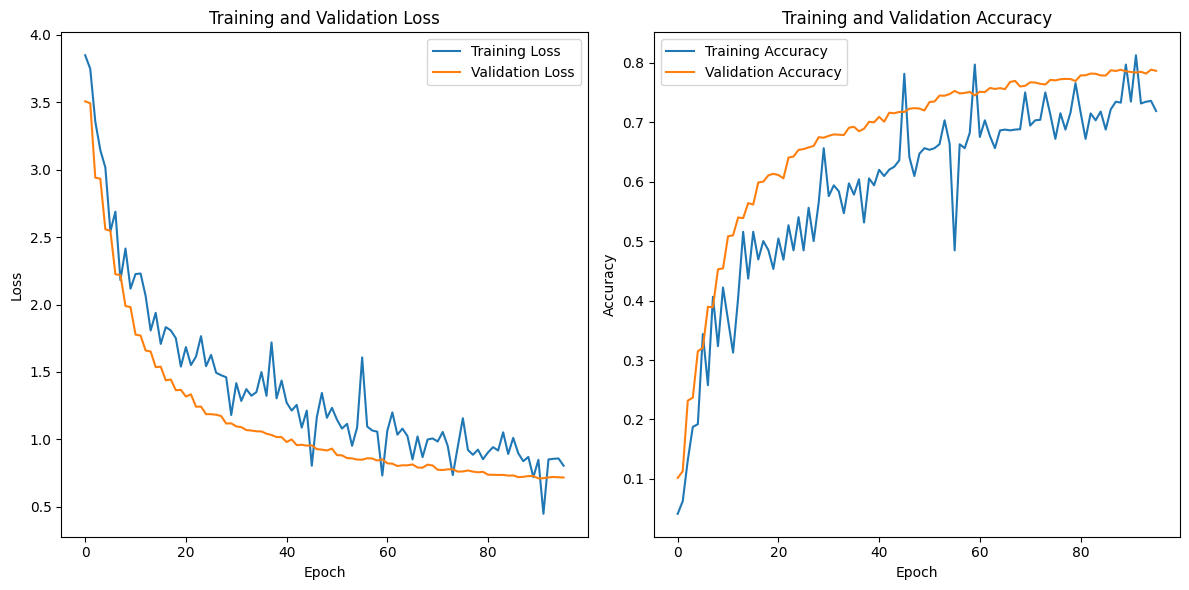

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### Evaluate and confusion matrix


✅ Test Accuracy: 78.43%
🧪 Test Loss: 0.7092


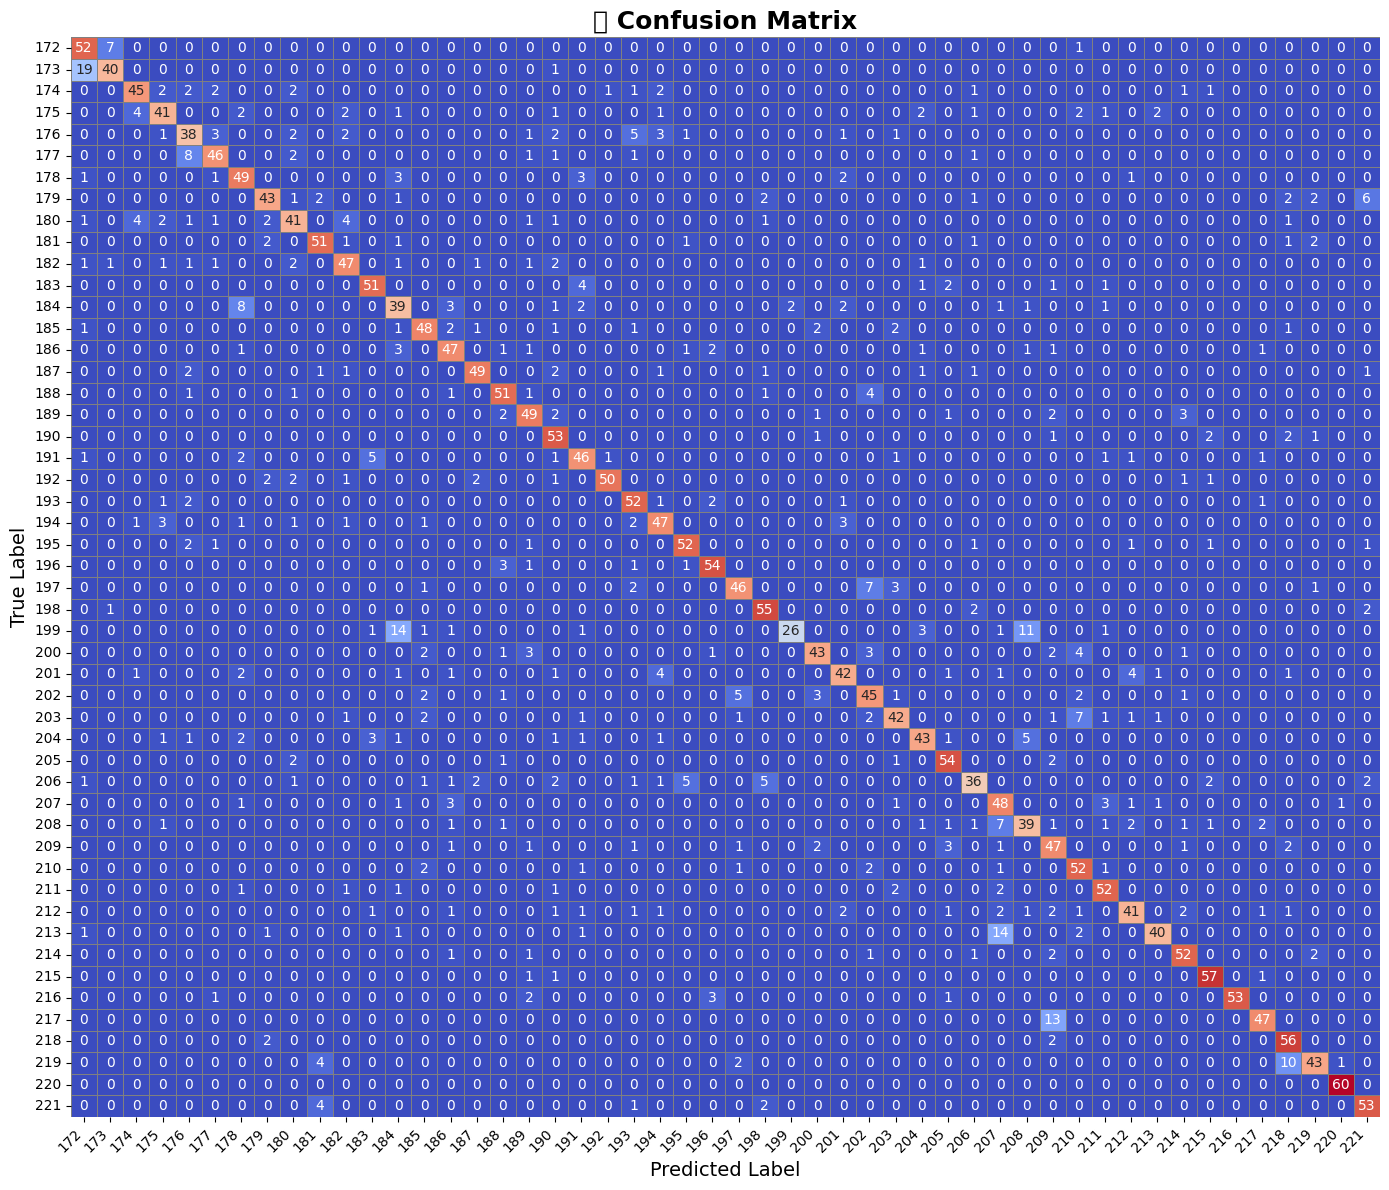


🧾 Classification Report:
              precision    recall  f1-score   support

         172       0.67      0.87      0.75        60
         173       0.82      0.67      0.73        60
         174       0.82      0.75      0.78        60
         175       0.77      0.68      0.73        60
         176       0.66      0.63      0.64        60
         177       0.82      0.77      0.79        60
         178       0.71      0.82      0.76        60
         179       0.83      0.72      0.77        60
         180       0.72      0.68      0.70        60
         181       0.82      0.85      0.84        60
         182       0.77      0.78      0.78        60
         183       0.84      0.85      0.84        60
         184       0.57      0.65      0.60        60
         185       0.80      0.80      0.80        60
         186       0.75      0.78      0.76        60
         187       0.89      0.82      0.85        60
         188       0.84      0.85      0.84        60
 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 🔧 Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")
print(f"🧪 Test Loss: {test_loss:.4f}")

# 🎯 Predict on test set
Y_pred = model.predict(test_generator, verbose=0)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 📊 Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 🎨 Plot the confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=class_labels, yticklabels=class_labels,
            linewidths=0.5, linecolor='gray', cbar=False)

plt.title('📊 Confusion Matrix', fontsize=18, weight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 📄 Optional: Detailed classification report
print("\n🧾 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


### ROC Curve (Micro-average)

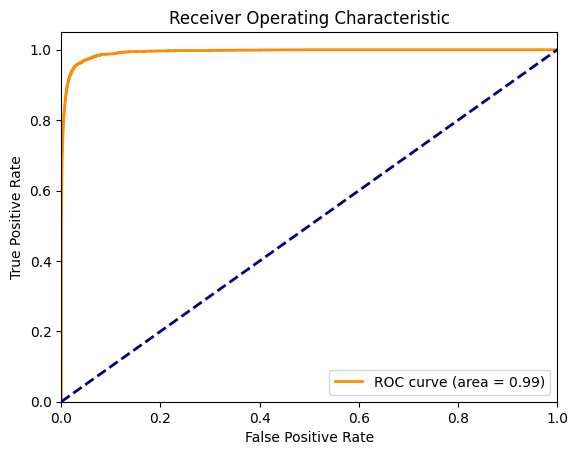

In [9]:
fpr, tpr, _ = roc_curve(tf.keras.utils.to_categorical(y_true, num_classes=50).ravel(), Y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Model Save

In [10]:
model.save("bangla_cnn_model.h5")

### Prediction Checking

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


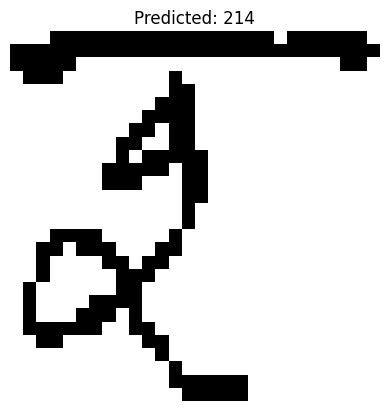

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

# Load your trained model
model = tf.keras.models.load_model('/kaggle/working/bangla_cnn_model.h5')  # Update if you saved the model

# Class labels (auto-detected from generator, but here you can load manually if needed)
class_indices = train_generator.class_indices
labels = dict((v, k) for k, v in class_indices.items())  # Invert to get class names

# Path to test image
img_path = '/kaggle/input/dataset1/basicfinal/basicfinal/Test/214/bcc000002.bmp'  # Replace with your actual test image path

# Load and preprocess the image
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction[0])
predicted_label = labels[predicted_class]

# Show image and prediction
plt.imshow(img_array[0].squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
